In [1]:
import GetOldTweets3 as got
import datetime
import time
from random import uniform
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def day():
    global days_range
    days_range = []
    start_input = input()
    end_input = input()
    start = datetime.datetime.strptime(start_input, "%Y-%m-%d")
    end = datetime.datetime.strptime(end_input, "%Y-%m-%d")
    date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
    
    for date in date_generated:
        days_range.append(date.strftime("%Y-%m-%d"))
        
    print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-1]))
    print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range)))

In [3]:
def tweetCriteria():
    global tweet
    
    # 수집 기간 맞추기
    start_date = days_range[0]
    end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d")
               + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    
    # 트윗 수집 기준 정의
    search_input = input()
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(search_input)\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)
    print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
    start_time = time.time()
    
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    
    # 수집 wirh GetOldTweet3
    print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
    print("=== Total num of tweets is {} ===".format(len(tweet)))

In [4]:
# 변수 저장하기
# 유저 아이디, 트윗 링크, 트윗 내용, 날짜, 리트윗 수, 관심글 수 수집 가능
# 원하는 변수 골라서 저장하기
def crawling():
    #initialize
    global tweet_list
    tweet_list = []
    
    for index in tqdm_notebook(tweet):
        # 메타데이터 목록
        # username = index.username
        # link = index.permalink 
        content = index.text
        tweet_date = index.date.strftime("%Y-%m-%d")
        # tweet_time = index.date.strftime("%H:%M:%S")
        # retweets = index.retweets
        # favorites = index.favorites
        
        # 결과 합치기
        info_list = [tweet_date, content]
        tweet_list.append(info_list)
        
        # 휴식
        time.sleep(uniform(1,2))

In [5]:
day()
tweetCriteria()
crawling()

2019-08-07
2019-08-17
=== 설정된 트윗 수집 기간은 2019-08-07 에서 2019-08-16 까지 입니다 ===
=== 총 10일 간의 데이터 수집 ===
여신강림
=== Total num of tweets is 519 ===


In [8]:
import pandas as pd

twitter_df = pd.DataFrame(tweet_list, 
                          columns = ["date", "text"])

twitter_df

,date,text
0,2019-08-16,여신강림 pic.twitter.com/9tNZpVMTgE
1,2019-08-16,부캐 메인 진짜 열심히 깻다 여신강림 이리아의 개척자 연금술사 셰익스피어 드라마 신...
2,2019-08-16,본래 겜캐는 무꼭지의 법칙을 못벗어납니다 보여야할위치에있는데도안보임 존나신기(흠터
3,2019-08-16,저두 사실 잘 안봐서..ㅠㅠ 그냥 전에 보던거나 제일 유명한 거 봐여 !! 예를들어...
4,2019-08-16,여신강림 작가님 승여니 팬이라고 해서 정주행 중인데 작년에 연재된 도현이 발견했다 ...
5,2019-08-16,ㅁㅊ....여신강림작가님 ㅁㅊ
6,2019-08-16,C1:솔직히 마비시작했으면 삼용사얼굴은 봐야하는거아닌가요 C2:죄송사실저도안함 C3...
7,2019-08-16,어쨌든 여신강림의 기반이 탄탄하게 쌓인 덕에.. 지금도 각 여신 혹은 주신 혹은 교...
8,2019-08-16,남들 다 안하고 넘어간다는 G7G8 (G8.. G7안하면 못하던가요? 난 모르겠네....
9,2019-08-16,여신강림 - 66화 (출처 : 네이버 웹툰) http://naver.me/F5ubwZZc


2019-08-07    63
2019-08-08    71
2019-08-09    30
2019-08-10    38
2019-08-11    37
2019-08-12    59
2019-08-13    86
2019-08-14    40
2019-08-15    49
2019-08-16    46
Name: date, dtype: int64


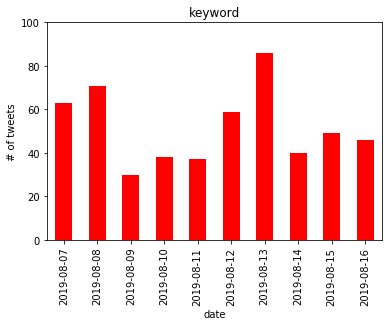

In [11]:
# 데이터 통계 확인
# 키워드 빈도 분석하기

def get_keywords(dataframe):
    keywords = []
    text = dataframe["text"].lower()
    if "여신강림" in text:
        keywords.append("여신강림")
    if "임주경" in text:
        keywords.append("임주경")
    if "수호파" in text:
        keywords.append("수호파")
    if "세준파" in text:
        keywords.append("세준파")
    return ",".join(keywords)

twitter_df["keyword"] = twitter_df.apply(get_keywords, axis=1)

# barplot 그리기

import matplotlib.pyplot as plt

counts = twitter_df["date"].value_counts().sort_index()

plt.title("keyword")
plt.ylabel("# of tweets")
plt.xlabel("date")
plt.ylim(0,100)
counts.plot(kind = 'bar', color='red')
print(counts)